# Importing Relevant Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Loading The Data**

In [2]:
df1 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_April_2019.csv')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


**Data Check and Cleaning**

In [3]:
df1.shape

(18383, 6)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [5]:
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18378    False
18379    False
18380    False
18381    False
18382    False
Length: 18383, dtype: bool

In [6]:
df1.duplicated().sum()

114

In [7]:
duplicates = df1.duplicated()

In [8]:
duplicate_rows = df1[duplicates]
duplicate_rows.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17339,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
17446,NaN,NaN,NaN,NaN,NaN,NaN
17718,NaN,NaN,NaN,NaN,NaN,NaN
17744,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
18194,193916,20in Monitor,1,109.99,04/18/19 12:59,"653 Cherry St, Dallas, TX 75001"


In [9]:
duplicate_rows.shape

(114, 6)

In [10]:
# After proper examination of all the duplicated rows (144 of them). It is apparent that some duplicates are unique;
# having duplicate entries in all but one column.
# We will thus remove the duplicates that have the same values across all entries, writing a function to this effect

def handle_duplicates(df1):
    """Function to drop entries in the 'Order ID' column with the values 'NAN' and 'Order ID' while keeping everything else.
    
    Parameters:
    - df1: DataFrame - The input DataFrame.
    
    Returns:
    - DataFrame: The DataFrame with specified entries in the 'Order_ID' column dropped.
    """
    df1_filtered = df1[~df1['Order ID'].isin(['NaN', 'Order ID'])]
    return df1_filtered

In [11]:
df1_filtered = handle_duplicates(df1)
df1_filtered.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
df1_filtered.duplicated().sum()
#Shows that the duplicates we want removed has been removed.

80

In [13]:
#checking for missing values
df1_filtered.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

In [14]:
missing_values = df1_filtered.isnull()
rows_with_missing_values = missing_values.any(axis = 1)
df1_filtered[rows_with_missing_values]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN
2265,NaN,NaN,NaN,NaN,NaN,NaN
2798,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#drop columns with missing values 
df1_cleaned = df1_filtered.dropna(how = 'all')

In [16]:
df1_cleaned

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [17]:
df1_cleaned.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [18]:
#Given we have multiple other datasets to analyze, now would be a good place to merge them before furter analysis.
df2 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_April_2019.csv')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [19]:
df2.shape

(18383, 6)

In [20]:
df3 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_December_2019.csv')
df3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [21]:
#load and chcek other datasets
df3.shape

(25117, 6)

In [22]:
df4 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_February_2019.csv')
df4.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [23]:
df4.shape

(12036, 6)

In [24]:
df5 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_January_2019.csv')
df5.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [25]:
df5.shape

(9723, 6)

In [26]:
df6 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_July_2019.csv')
df6.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [27]:
df6.shape

(14371, 6)

In [28]:
df7 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_June_2019.csv')
df7.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [29]:
df7.shape

(13622, 6)

In [30]:

df8 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_March_2019.csv')
df8.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [31]:
df8.shape

(15226, 6)

In [32]:
df9 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_May_2019.csv')
df9.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [33]:
df9.shape

(16635, 6)

In [34]:
df10 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_September_2019.csv')
df10.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [35]:
df10.shape

(11686, 6)

In [36]:
df11 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_October_2019.csv')
df11.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [37]:
df11.shape

(20379, 6)

In [38]:
df12 = pd.read_csv(r'C:\Users\user\Downloads\archive (2)\Sales_November_2019.csv')
df12.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [39]:
df12.shape

(17661, 6)

In [40]:
#join all datasets
combined_df = pd.concat([df1_cleaned, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 0)
combined_df = combined_df.reset_index(drop=True)
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [41]:
combined_df.shape

(193128, 6)

In [42]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193128 entries, 0 to 193127
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          192611 non-null  object
 1   Product           192611 non-null  object
 2   Quantity Ordered  192611 non-null  object
 3   Price Each        192611 non-null  object
 4   Order Date        192611 non-null  object
 5   Purchase Address  192611 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


In [43]:
#convert the affected columns into the right dtype
combined_df['Order ID'] = pd.to_numeric(combined_df['Order ID'],errors='coerce')
print(combined_df['Order ID'].dtype)

float64


In [44]:
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'], errors='coerce')
print(combined_df['Quantity Ordered'].dtype)

float64


In [45]:
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'], errors='coerce')
print(combined_df['Price Each'].dtype)

float64


In [46]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193128 entries, 0 to 193127
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          192282 non-null  float64
 1   Product           192611 non-null  object 
 2   Quantity Ordered  192282 non-null  float64
 3   Price Each        192282 non-null  float64
 4   Order Date        192611 non-null  object 
 5   Purchase Address  192611 non-null  object 
dtypes: float64(3), object(3)
memory usage: 8.8+ MB


In [50]:
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])
# There was an error message when i ran this code
#The error message suggests that there is an issue with the format of the date values in the 'Order Date' column.
#The pd.to_datetime() function in pandas expects the date values to be in a recognized date format. So we assign the format first.


In [51]:
date_format = '%m/%d/%y %H:%M'  # Example format: 'YYYY/MM/DD'

# Parse 'Order Date' column with the specified format
combined_df['Order_Date'] = pd.to_datetime(combined_df['Order Date'], format = date_format, errors='coerce')
print(combined_df['Order_Date'].dtype)

datetime64[ns]


In [52]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193128 entries, 0 to 193127
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          192282 non-null  float64       
 1   Product           192611 non-null  object        
 2   Quantity Ordered  192282 non-null  float64       
 3   Price Each        192282 non-null  float64       
 4   Order Date        192611 non-null  object        
 5   Purchase Address  192611 non-null  object        
 6   Order_Date        192282 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 10.3+ MB


***Renaming The Columns***

In [53]:
combined_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Order_Date'],
      dtype='object')

In [54]:
combined_df = combined_df.rename(columns = {
    'Order ID': 'Order_ID',
    'Product': 'Product',
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each': 'Price_Each',
    'Order Date': 'Order_Dates',
    'Purchase Address': 'Purchase_Address'
})

In [55]:
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Dates,Purchase_Address,Order_Date
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00


In [56]:
combined_df = combined_df.drop('Order_Dates', axis=1)

In [57]:
combined_df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Order_Date
0,176558.0,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00
1,176559.0,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00


**EDA**

In [58]:
combined_df.describe(include = 'O')

,Product,Purchase_Address
count,192611,192611
unique,20,133596
top,USB-C Charging Cable,Purchase Address
freq,22638,329


In [59]:
combined_df.describe()

,Order_ID,Quantity_Ordered,Price_Each
count,192282.000000,192282.000000,192282.000000
mean,225382.541049,1.124416,184.270462
std,52220.604944,0.441763,332.585098
min,141234.000000,1.000000,2.990000
25%,181962.250000,1.000000,11.950000
50%,215836.500000,1.000000,14.950000
75%,273529.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [60]:
numeric_columns = combined_df.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop('Order_ID', errors='ignore')
numeric_columns

Index(['Quantity_Ordered', 'Price_Each'], dtype='object')

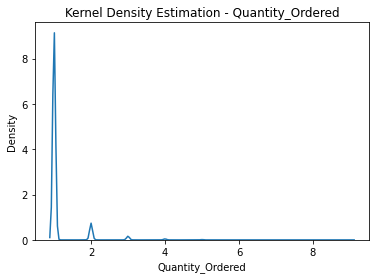

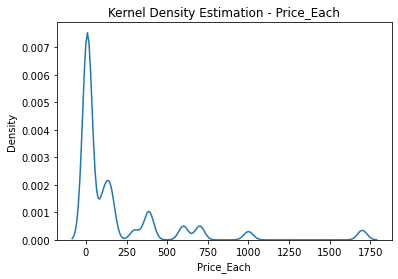

In [61]:
#visualize the numeric columns on a KDE to check their distribution.
for column in numeric_columns:
    fig, ax = plt.subplots()
    
    sns.kdeplot(combined_df[column], ax=ax)
  
    ax.set_title(f'Kernel Density Estimation - {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    
  
    plt.show()

In [62]:
combined_df['Price_Each'].value_counts()

11.95      22638
14.95      22504
2.99       21290
3.84       21284
11.99      19580
150.00     16064
99.99      13734
149.99      7755
600.00      7104
700.00      7097
379.99      6450
389.99      6356
300.00      4927
1700.00     4878
999.99      4245
109.99      4232
400.00      2144
Name: Price_Each, dtype: int64

In [63]:
combined_df['Price_Each'].nunique()

17

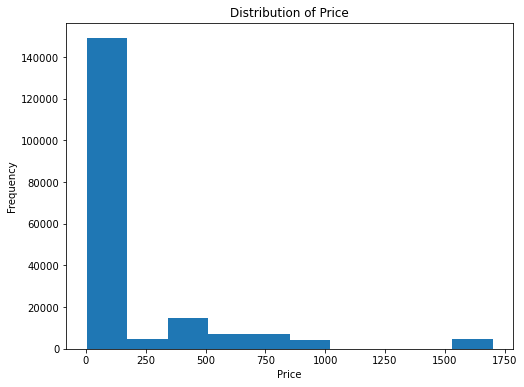

In [64]:
plt.figure(figsize = (8,6))
plt.hist(combined_df['Price_Each'], bins = 10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [65]:
price_stats = combined_df['Price_Each'].describe()
print(price_stats)
print("Skewness:", combined_df['Price_Each'].skew())

count    192282.000000
mean        184.270462
std         332.585098
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price_Each, dtype: float64
Skewness: 2.8725904011159527


In [66]:
Max_prices = combined_df.loc[combined_df['Price_Each'] == combined_df['Price_Each'].max()]
print(Max_prices.head())
print(Max_prices.shape)
#The size of this suggests that they are not outliers.

     Order_ID             Product  Quantity_Ordered  Price_Each  \
8    176565.0  Macbook Pro Laptop               1.0      1700.0   
85   176639.0  Macbook Pro Laptop               1.0      1700.0   
89   176643.0  Macbook Pro Laptop               1.0      1700.0   
92   176646.0  Macbook Pro Laptop               1.0      1700.0   
135  176687.0  Macbook Pro Laptop               1.0      1700.0   

                           Purchase_Address          Order_Date  
8    915 Willow St, San Francisco, CA 94016 2019-04-24 10:38:00  
85    853 Cedar St, San Francisco, CA 94016 2019-04-28 16:14:00  
89           373 Adams St, Boston, MA 02215 2019-04-27 21:32:00  
92         657 Adams St, Portland, OR 97035 2019-04-22 07:14:00  
135    121 Wilson St, Los Angeles, CA 90001 2019-04-30 10:26:00  
(4878, 6)


In [67]:
# which products then have the highest prices?
pricy_products = combined_df.loc[combined_df['Price_Each']>1500,['Product']]
print(pricy_products.nunique())
print("products:", pricy_products.head())

Product    1
dtype: int64
products:                 Product
8    Macbook Pro Laptop
85   Macbook Pro Laptop
89   Macbook Pro Laptop
92   Macbook Pro Laptop
135  Macbook Pro Laptop


***What Is The Total Number of Sales?***

In [68]:
len(combined_df['Order_ID'])

193128

In [69]:
len(combined_df['Order_ID'].unique())
Total_N0_sales = len(combined_df['Order_ID'].unique())
print("Total Number of Sales Is:", Total_N0_sales )

Total Number of Sales Is: 166957


***Average Sales Per Month***

In [70]:
#To get the number of sales for each month across the year to carry out further analysis, we need to extract relevant columns.
combined_df['Order_month'] = combined_df['Order_Date'].dt.month_name().str[:3]
Order_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
combined_df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Order_Date,Order_month
0,176558.0,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,Apr
1,176559.0,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,Apr
2,176560.0,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,Apr
3,176560.0,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,Apr
4,176561.0,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,Apr


In [71]:
 combined_df.groupby('Order_month')['Order_ID'].nunique()

Order_month
Apr    17528
Aug       15
Dec    24004
Feb    11496
Jan     9293
Jul    13761
Jun    12989
Mar    14549
May    15836
Nov    16859
Oct    19436
Sep    11190
Name: Order_ID, dtype: int64

In [72]:
Average_Monthly_Sales = combined_df.groupby('Order_month')['Order_ID'].nunique()/combined_df['Order_month'].nunique()
Average_Monthly_Sales

Order_month
Apr    1460.666667
Aug       1.250000
Dec    2000.333333
Feb     958.000000
Jan     774.416667
Jul    1146.750000
Jun    1082.416667
Mar    1212.416667
May    1319.666667
Nov    1404.916667
Oct    1619.666667
Sep     932.500000
Name: Order_ID, dtype: float64

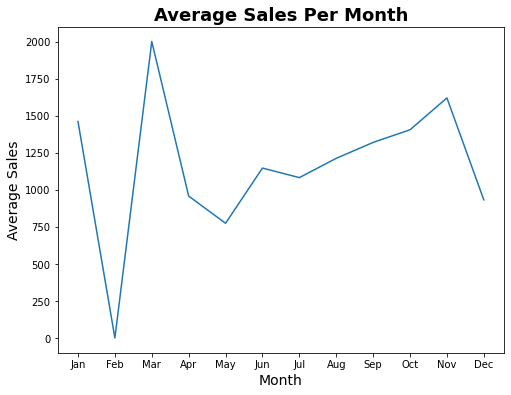

In [73]:
sales = Average_Monthly_Sales
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (8,6))
plt.plot(month, sales)
plt.title('Average Sales Per Month', fontsize = 18, fontweight = 'bold')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Average Sales', fontsize = 14)
plt.show()

***Monthly Revenue?***

In [74]:
combined_df['Revenue'] = combined_df['Quantity_Ordered'] * combined_df['Price_Each']

In [75]:
Monthly_Revenue = combined_df.groupby('Order_month')['Revenue'].sum()
Monthly_Revenue

Order_month
Apr    6776170.06
Aug       2152.31
Dec    4613443.34
Feb    2202022.42
Jan    1822256.73
Jul    2647775.76
Jun    2577802.26
Mar    2807100.38
May    3163166.04
Nov    3199603.20
Oct    3736726.88
Sep    2095463.39
Name: Revenue, dtype: float64

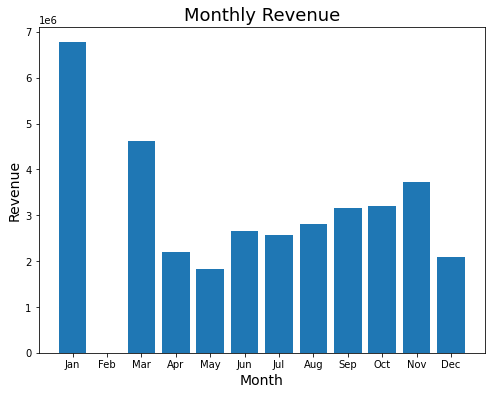

In [76]:
months =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
revenue = Monthly_Revenue

plt.figure(figsize = (8,6))
plt.bar(month, Monthly_Revenue)
plt.title('Monthly Revenue',  fontsize = 18)
plt.xlabel('Month',  fontsize = 14)
plt.ylabel('Revenue', fontsize = 14)
plt.show()

***What Are The Key Demographics of The Customers?***

In [77]:
split_address = combined_df[['Street', 'City', 'Zip']] = combined_df['Purchase_Address'].str.split(', ', expand = True)
combined_df['Street'] = split_address[0]
combined_df['City'] = split_address[1]
combined_df['State'] = ''
combined_df['ZIP'] = split_address[2]

In [78]:
combined_df.head(2)

,Order_ID,Product,Quantity_Ordered,Price_Each,Purchase_Address,Order_Date,Order_month,Revenue,Street,City,Zip,State,ZIP
0,176558.0,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,Apr,23.90,917 1st St,Dallas,TX 75001,,TX 75001
1,176559.0,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,Apr,99.99,682 Chestnut St,Boston,MA 02215,,MA 02215


In [79]:
combined_df.drop(['ZIP'], axis=1, inplace=True)

In [80]:
combined_df['City'].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin', nan, None],
      dtype=object)

In [81]:
combined_df['City'].nunique()

9

In [82]:
monthly_city_revenue = combined_df.groupby(['Order_month', 'City'])['Revenue'].sum()
monthly_city_revenue

Order_month  City         
Apr          Atlanta           568891.84
             Austin            345367.18
             Boston            706571.50
             Dallas            502120.96
             Los Angeles      1100363.10
                                 ...    
Sep          Los Angeles       353960.75
             New York City     300563.83
             Portland          132559.49
             San Francisco     462790.81
             Seattle           156354.32
Name: Revenue, Length: 104, dtype: float64

In [83]:
combined_df['Order_month'].unique()

array(['Apr', 'May', nan, 'Dec', 'Jan', 'Feb', 'Mar', 'Jul', 'Aug', 'Jun',
       'Sep', 'Oct', 'Nov'], dtype=object)

In [84]:
#The data appears to have limited entries for certain cities in some months.

In [85]:
combined_df.columns

Index(['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each',
       'Purchase_Address', 'Order_Date', 'Order_month', 'Revenue', 'Street',
       'City', 'Zip', 'State'],
      dtype='object')

***What Were The Best and Worst Selling Periods?***

In [86]:
sales_by_period = combined_df.groupby('Order_month')['Quantity_Ordered'].sum()
sales_by_period

Order_month
Apr    41097.0
Aug       18.0
Dec    28114.0
Feb    13449.0
Jan    10903.0
Jul    16072.0
Jun    15253.0
Mar    17005.0
May    18696.0
Nov    19798.0
Oct    22703.0
Sep    13097.0
Name: Quantity_Ordered, dtype: float64

In [87]:
best_period = sales_by_period.idxmax()
best_sales = sales_by_period.max()

In [88]:
worst_period = sales_by_period.idxmin()
worst_sales = sales_by_period.min()

In [89]:
print('Best Selling Period: {} with {} sales'.format(best_period, best_sales))
print('Worst Selling Period: {} with {} sales'.format(worst_period, worst_sales))

Best Selling Period: Apr with 41097.0 sales
Worst Selling Period: Aug with 18.0 sales


***Which Product Sells The Most?***

In [90]:
product_sales = combined_df.groupby('Product')['Quantity_Ordered'].sum()
product_sales

Product
20in Monitor                   4262.0
27in 4K Gaming Monitor         6370.0
27in FHD Monitor               7795.0
34in Ultrawide Monitor         6471.0
AA Batteries (4-pack)         28631.0
AAA Batteries (4-pack)        31934.0
Apple Airpods Headphones      16176.0
Bose SoundSport Headphones    13865.0
Flatscreen TV                  4947.0
Google Phone                   5753.0
LG Dryer                        677.0
LG Washing Machine              679.0
Lightning Charging Cable      24147.0
Macbook Pro Laptop             4884.0
Product                           0.0
ThinkPad Laptop                4247.0
USB-C Charging Cable          24783.0
Vareebadd Phone                2145.0
Wired Headphones              21333.0
iPhone                         7106.0
Name: Quantity_Ordered, dtype: float64

In [91]:
best_selling_products = product_sales.nlargest(5)

In [92]:
print('Best Selling Products:')
print(best_selling_products)

Best Selling Products:
Product
AAA Batteries (4-pack)      31934.0
AA Batteries (4-pack)       28631.0
USB-C Charging Cable        24783.0
Lightning Charging Cable    24147.0
Wired Headphones            21333.0
Name: Quantity_Ordered, dtype: float64


In [93]:
product_sales.nsmallest(5)

Product
Product                  0.0
LG Dryer               677.0
LG Washing Machine     679.0
Vareebadd Phone       2145.0
ThinkPad Laptop       4247.0
Name: Quantity_Ordered, dtype: float64

***Which products should the company order more or less of?***


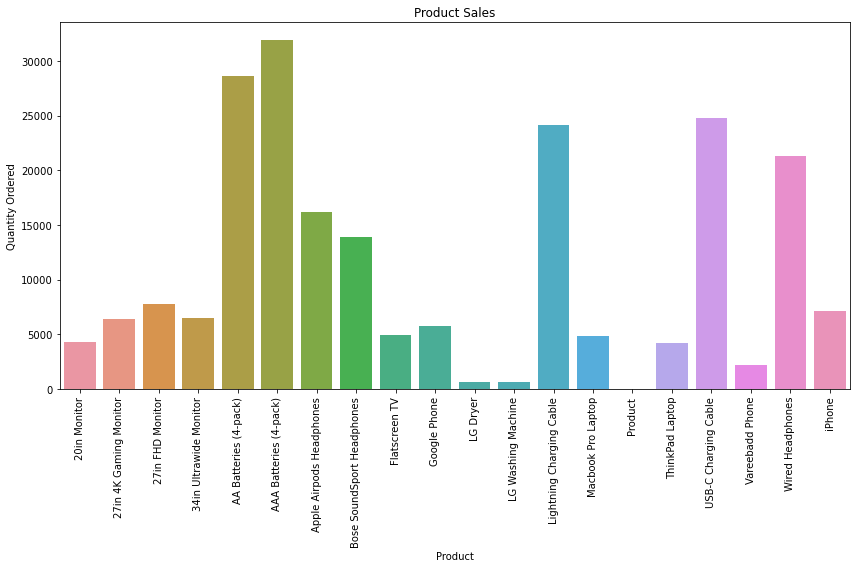

In [98]:
plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Product Sales')
plt.tight_layout()